# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [396]:
# import necessary libraries
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")


In [397]:
# read in data into pandas df
music = pd.read_csv("../assets/billboard.csv")
music.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [398]:
# explore data types
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          317 non-null object
x3rd.week          317 non-null object
x4th.week          317 non-null object
x5th.week          317 non-null object
x6th.week          317 non-null object
x7th.week          317 non-null object
x8th.week          317 non-null object
x9th.week          317 non-null object
x10th.week         317 non-null object
x11th.week         317 non-null object
x12th.week         317 non-null object
x13th.week         317 non-null object
x14th.week         317 non-null object
x15th.week         317 non-null object
x16th.week         317 non-null object


##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data show the songs that featured in billboard top 100 in late 1999 and 2000.  Each row represents a song, and provides information about the artist, length of the song, the date it entered the chart, the date it reached its peak in the chart, as well as information about chart position for the 76 weeks after its entry.  If, in a given week after entry, the song was no longer in the charts, an asterisk is placed in field for its chart position for that week.  Additionally, there are some missing values for chart position in certain weeks.  

Several of the variables seem to be of the wrong type.  The two date fields are formatted as strings and the length of the song is formatted as a string, rather than an integer or float.  On brief initial inspection, it appears that the data set may encompass more than just the year 2000 (particularly since there are 76 columns for chart position by week), and may inconsistently include songs from 1999.  This will be further explored during the data scrub. 

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [399]:
# rename chart weeks columns
labels = id_variables=list(music.columns.values)[:7]
for i in ["week"+str(i+1) for i in range(76)]:
    labels.append(i)
music.columns = labels

# rename arist column
music.rename(columns = {"artist.inverted":"artist"}, inplace = True)

In [400]:
# change all the * to NaNs
def replace_nulls(value):
    if value == '*':
        return np.nan
    else:
        return value
music=music.applymap(replace_nulls)

# remove the empty columns
music=music.dropna(axis=1, how='all')
music.columns

Index([u'year', u'artist', u'track', u'time', u'genre', u'date.entered',
       u'date.peaked', u'week1', u'week2', u'week3', u'week4', u'week5',
       u'week6', u'week7', u'week8', u'week9', u'week10', u'week11', u'week12',
       u'week13', u'week14', u'week15', u'week16', u'week17', u'week18',
       u'week19', u'week20', u'week21', u'week22', u'week23', u'week24',
       u'week25', u'week26', u'week27', u'week28', u'week29', u'week30',
       u'week31', u'week32', u'week33', u'week34', u'week35', u'week36',
       u'week37', u'week38', u'week39', u'week40', u'week41', u'week42',
       u'week43', u'week44', u'week45', u'week46', u'week47', u'week48',
       u'week49', u'week50', u'week51', u'week52', u'week53', u'week54',
       u'week55', u'week56', u'week57', u'week58', u'week59', u'week60',
       u'week61', u'week62', u'week63', u'week64', u'week65'],
      dtype='object')

In [401]:
# convert chart position columns to floats
music.loc[:,"week1":"week65"] = music.loc[:,"week1":"week65"].astype(float)

In [402]:
# convert date.entered and date.peaked to datetime
music.loc[:,["date.entered","date.peaked"]] = music.loc[:,["date.entered","date.peaked"]].applymap(pd.to_datetime)

In [403]:
# check the value counts by genre
music["genre"].value_counts()

Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             13
R & B           10
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [404]:
# change R & B to R&B
def replace_RB(value):
    if value=="R & B":
        return "R&B"
    else:
        return value

music["genre"] = music["genre"].apply(replace_RB)

In [405]:
# check that there are no repeating song names
music["track"].value_counts().head()

Where I Wanna Be              2
If You Don't Wanna Love Me    1
Just Be A Man About It        1
With Arms Wide Open           1
Girls Dem Sugar               1
Name: track, dtype: int64

In [406]:
# "Where I Wanna Be" appears twice.  Rename each one such that artist's name is also included
# Find index for the two values
music[music["track"]=="Where I Wanna Be"]

,year,artist,track,time,genre,date.entered,date.peaked,week1,week2,week3,...,week56,week57,week58,week59,week60,week61,week62,week63,week64,week65
118,2000,"Jones, Donell",Where I Wanna Be,"6,22,00 AM",Rock,2000-04-22,2000-07-08,81.0,71.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,2000,"Sheist, Shade",Where I Wanna Be,"4,16,00 AM",Rap,2000-11-11,2000-11-18,96.0,95.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
# replace each song name with song name + artist 
music.loc[118,"track"]=music.loc[118,"track"]+" "+music.loc[118,"artist"]
music.loc[305,"track"]=music.loc[305,"track"]+" "+music.loc[305,"artist"]
music["track"].value_counts().head()

If You Don't Wanna Love Me    1
Just Be A Man About It        1
With Arms Wide Open           1
Girls Dem Sugar               1
More                          1
Name: track, dtype: int64

In [408]:
# convert time column into fractional minutes 
# split string into three columns, convert to integer and create column for fractional minutes
music[["mins","secs","remainder"]]=pd.DataFrame(music.time.str.split(",",2).tolist(),columns = ["mins","secs","remainder"])
music[["mins","secs"]] = music[["mins","secs"]].astype(int)
music["length_mins"] = music["mins"] + music["secs"]/60.0

In [409]:
# drop unnecessary columns
music.drop(["mins","secs","remainder"], axis=1, inplace=True)

In [410]:
# examine the labeled genres by showing number of songs by artist in each genre
pd.pivot_table(music, index=["artist"], columns=["genre"], values="track",aggfunc=len)

genre,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock,Rock'n'roll
artist,,,,,,,,,,,
2 Pac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2Ge+her,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3 Doors Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
504 Boyz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
98�,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
A*Teens,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Aaliyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
"Adams, Yolanda",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Adkins, Trace",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Some of the genres seem questionable (e.g., Aaliyah in Rock and Rock 'n' Roll), but not so much as to suggest systematic mislabelling.  It may just be a case of subjective classification of the music by the Billboard team.  There is, therefore, no reason to exclude the genre classification from the analysis.**

In [411]:
# show the number of entries by date, sorted by earliest dates.
music["date.entered"].value_counts().sort_index().head(10)

1999-06-05    1
1999-07-17    1
1999-09-04    1
1999-09-11    1
1999-10-09    2
1999-10-16    2
1999-10-23    3
1999-10-30    2
1999-11-06    2
1999-11-13    4
Name: date.entered, dtype: int64

**The value counts suggest that songs entering the charts before 1999-10-09 were inconsistenly included (there aren't entries for each week), data prior to this date will be stripped out.**

In [412]:
# remove data for songs that entered before 1999-10-09
music=music[music["date.entered"]>pd.to_datetime("1999-10-09")]

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [413]:
# create a list of id variables
id_variables=list(music.columns.values)
del id_variables[7:72]

# use melt to create df with one row for each week a song appeared in the charts
music_long=pd.melt(music, id_vars=id_variables, var_name='week', value_name="rank")
music_long=music_long.sort_values(["track","week"])

# remove rows for which rank is missing 
music_long = music_long.dropna(subset=["rank"])
music_long.head()

,year,artist,track,time,genre,date.entered,date.peaked,length_mins,week,rank
44,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week1,100.0
2843,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week10,36.0
3154,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week11,37.0
3465,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week12,30.0
3776,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week13,23.0


In [414]:
# add date for each entry (based on entry data + week number)
from datetime import timedelta

# turn week variable into number
music_long["weeknumber"]=music_long["week"].apply(lambda x: x[4:]).astype(int)

# add a column for date
music_long["date"]=music_long["date.entered"]+timedelta(7)*(music_long["weeknumber"]-1)
music_long.head()

,year,artist,track,time,genre,date.entered,date.peaked,length_mins,week,rank,weeknumber,date
44,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week1,100.0,1,2000-04-29
2843,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week10,36.0,10,2000-07-01
3154,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week11,37.0,11,2000-07-08
3465,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week12,30.0,12,2000-07-15
3776,2000,Nelly,(Hot S**t) Country Grammar,"4,17,00 AM",Rap,2000-04-29,2000-09-16,4.283333,week13,23.0,13,2000-07-22


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

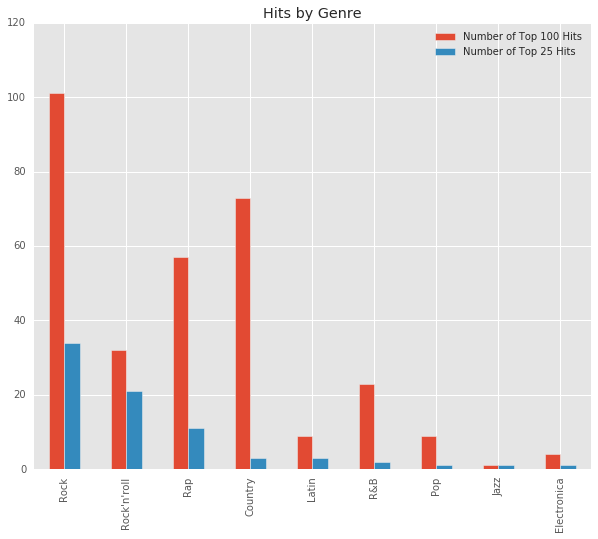

In [415]:
# number of billboard entries and number of top 20 hits by genre
# create a column for highest chart position
music["top_position"] = music.loc[:,"week1":"week65"].apply(np.min,axis=1)

# count number of hits by genre
a = music["genre"].value_counts().to_frame()

# count number of top 10 hits by genre
b = music[music["top_position"]<=20]["genre"].value_counts().to_frame()

# merge hit counts with top 10 hit counts
result = pd.merge(a, b, left_index=True, right_index=True, how='inner')
result.columns=["num_hits","num_top20"]

#plot bar chart
plt.figure()
result.plot(kind="bar", figsize=(10,8))
plt.title("Hits by Genre")
plt.legend( ["Number of Top 100 Hits", "Number of Top 25 Hits"])

**Rock, Rock'n'roll and Country appear to be the most popular categories.**

[<matplotlib.text.Text at 0x140355a90>, <matplotlib.text.Text at 0x12bd09250>]

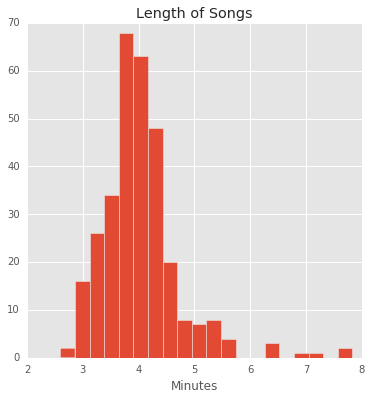

In [416]:
# distribution of length of songs
ax=music["length_mins"].hist(bins=20, figsize=(6,6))
ax.set(title="Length of Songs", xlabel="Minutes")

**The song times appear to be normally distributed, but skewed to the right with a tail.**

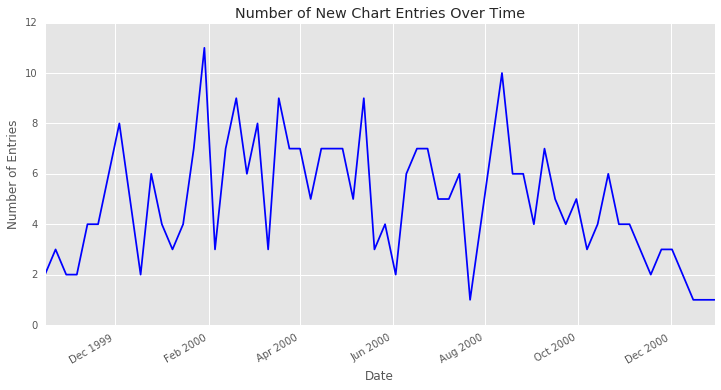

In [417]:
# number of new entries by week over time
ax=music["date.entered"].value_counts().sort_index().plot(c="blue", figsize=(12,6))
ax.set(title="Number of New Chart Entries Over Time", xlabel="Date", ylabel="Number of Entries")

In [437]:
# create df of count of number of tracks in the chart in each week
weekly_genres=pd.pivot_table(music_long,index=["date"],columns=["genre"],values="track", aggfunc=len)
weekly_genres.reset_index(inplace=True)
weekly_genres.tail()

genre,date,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock,Rock'n'roll
73,2001-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,3.0
74,2001-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,2.0
75,2001-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0
76,2001-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0
77,2001-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [438]:
# set the index to formatted date (year month)
import datetime
weekly_genres["chart week"] = weekly_genres["date"].apply(lambda x: x.strftime('%Y %B') )
weekly_genres.set_index("chart week", inplace=True)
weekly_genres.tail()

genre,date,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock,Rock'n'roll
chart week,,,,,,,,,,,,
2001 March,2001-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,3.0
2001 March,2001-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,2.0
2001 March,2001-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0
2001 March,2001-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0
2001 April,2001-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


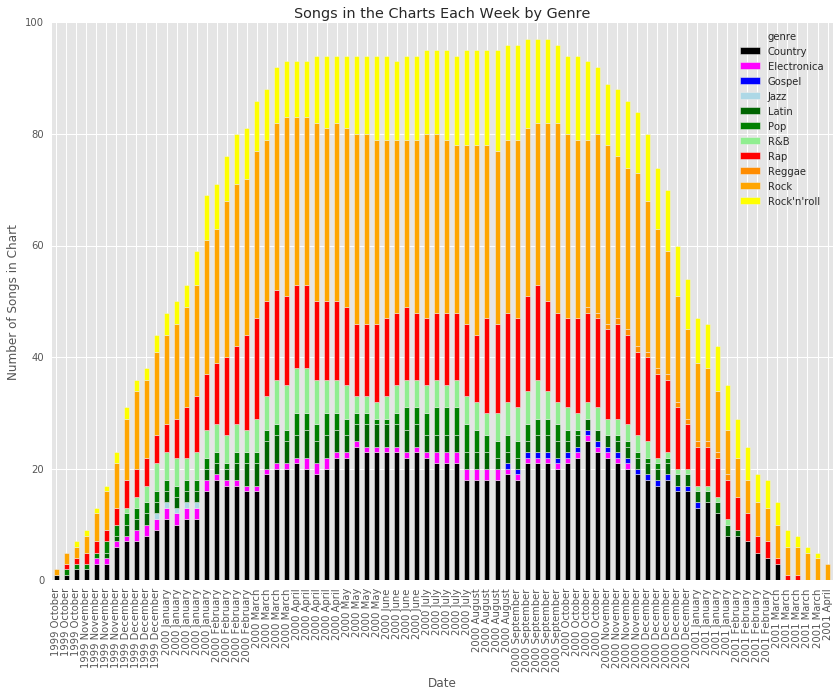

In [441]:
# plot the number of hits in the charts each week, by genre
ax = weekly_genres.plot(kind="bar", stacked=True, figsize=(14,10),\
color=["black","magenta","blue","lightblue","darkgreen","green", "lightgreen","red","darkorange","orange","yellow"])
ax.set(xlabel="Date", ylabel="Number of Songs in Chart", title="Songs in the Charts Each Week by Genre")
plt.show()

** From this chart, it's clear that Rock, Rock'n'roll and Country dominate.  It also seems to indicate that data is missing - complete data should have 100 hits in the charts every week.**

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Given the large number of songs in the top 100 charts in 2000, to better decide which songs to promote or fund, those in the industry would likely want to understand which songs are successful, and how they chart.  With that as motivation, I'll be exloring the reasons that some songs are more successful.  I'll also be looking at the behaviour of hit songs while they are in the charts.

Specifically, I'll be exploring three hypotheses.

1) Given that the Rock genre has the most billboard hits in the time period, the Rock genre will also be the most popular genre as measured by time in the charts and top chart position.

2) There is fairly little variation in the length of songs that made it onto the Billboard Top100, with relatively few songs over 5 minutes long. Songs that are longer than the typical song will exhibit different levels of succes than songs of a typical length.

3) Songs take time to build in popularity; therefore songs that reach higher ultimate chart positions will reach their peaks more slowly.  Related to this, songs that reach higher ultimate positions will take longer to subsequently leave the charts.

NB: A quick word on chart positions.
The chart positions are represented by ranks from 1 to 100, with 1 being the highest rank, and 100 the lowest.  Consistent with the typical language used to describe charts, when I describe "higher ranks," I'm referring to a lower absolute rank (i.e. position 3 is higher than position 10).


## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

* Apart from weekly chart ranks, the data do not provide measures of success for the tracks.  In order to assess the  success of songs, measures of success for each track need to be calculated.
* The measures used will be: 
    * Top position over all the weeks in the chart
    * Number of weeks in the chart
* To measure the speed the track peaked, the number of weeks between date peaked and date entered will be calculated
* For hypothesis 1, the Rock tracks can be compared to the population of tracks with respect to:
     * the average top position 
     * the average number of weeks in the chart 
    
 
* For hypothesis 2, two samples can be compared. The first is songs whose length fall in the top decile (the right tail of the distribution of lengths).  The second sample is songs whose length fall in the middle decile. The two samples can be compared with respect to:
     * Average top chart position
     * Average number of weeks in the charts
     
* For hypothesis 3, songs that peaked in the top 40 (rougly half the dataset) will be considered more popular, and  compared to songs that peaked at 41-100 (less popular).  They will be compared with respect to:
    * Average time to peak
    * Average time to leave the charts

In [421]:
# create some new columns to measure success of music

# weeks to peak
music["weeks_to_peak"] = music["date.peaked"]-music["date.entered"]
music["weeks_to_peak"] = music["weeks_to_peak"].astype('timedelta64[W]')

# weeks in charts
music["weeks_in_charts"] = music.loc[:,"week1":"week65"].apply(lambda x: np.count_nonzero(~np.isnan(x)),axis=1)

# weeks in top 10
music["weeks_in_top10"] = music.loc[:,"week1":"week65"].apply(lambda x: np.count_nonzero(x<=10),axis=1)

**Explore the new measures of success**

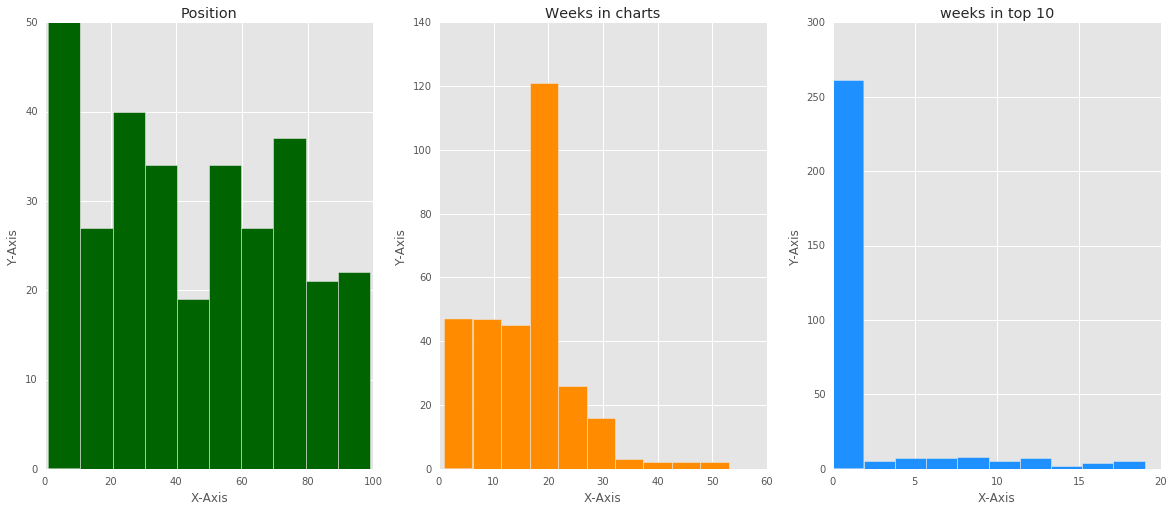

In [422]:
# plot histograms of position, weeks in charts and weeks in top 10
fig, ax = plt.subplots(ncols=3, figsize=(20,8))
ax[0].hist(music["top_position"], color="darkgreen")
ax[0].set(title='Position', ylabel='Y-Axis', xlabel='X-Axis')
ax[1].hist(music["weeks_in_charts"], color="darkorange")
ax[1].set(title='Weeks in charts', ylabel='Y-Axis', xlabel='X-Axis')
ax[2].hist(music["weeks_in_top10"], color="dodgerblue")
ax[2].set(title='weeks in top 10', ylabel='Y-Axis', xlabel='X-Axis')

**There are a large number of tracks that stayed in the charts for roughly 20 weeks.  I don't explore this here, but this might make for interesting further work.**

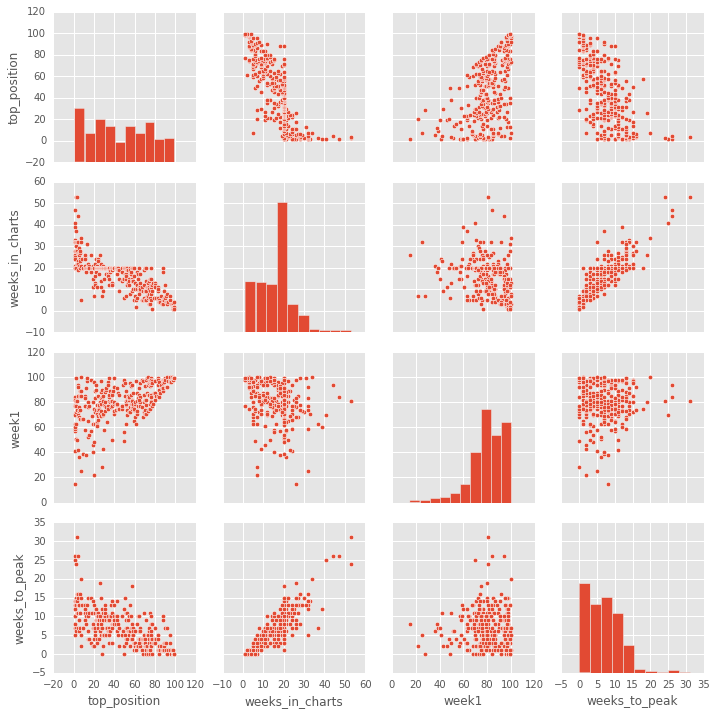

In [423]:
# show the measures of succes (top chart position, weeks in the charts, and entry position), and time to peak, plotted against each other
sns.pairplot(music.loc[:,["top_position","weeks_in_charts","week1","weeks_to_peak"]])

**Weeks to peak and number of weeks in charts appear to have a positive association; songs that peak more slowly are in the charts longer (which makes sense given that the two are linked).  By contrast, top chart position and number of weeks in the charts appear to be negatively associated.  Similarly, top chart position and time to peak appear to be negatively associated.  The suggests that more successful songs peak more slowly, and spend more time in the charts.**

In [424]:
import scipy as sp
from scipy import stats

### Hypothesis 1

In [425]:
# show the number of songs that peaked at each position in the top 10 by genre.
pd.pivot_table(music,index=["top_position"],values=["year"],columns=["genre"], aggfunc=len).iloc[0:10,:]

year                                                          \
genre        Country Electronica Gospel Jazz Latin  Pop R&B  Rap Reggae Rock   
top_position                                                                   
1.0              NaN         NaN    NaN  NaN   1.0  NaN NaN  NaN    NaN  8.0   
2.0              NaN         NaN    NaN  NaN   1.0  NaN NaN  1.0    NaN  3.0   
3.0              NaN         NaN    NaN  NaN   NaN  NaN NaN  NaN    NaN  2.0   
4.0              NaN         NaN    NaN  NaN   NaN  NaN NaN  2.0    NaN  NaN   
5.0              NaN         NaN    NaN  NaN   NaN  1.0 NaN  1.0    NaN  2.0   
6.0              NaN         1.0    NaN  NaN   NaN  NaN NaN  NaN    NaN  5.0   
7.0              NaN         NaN    NaN  1.0   NaN  NaN NaN  1.0    NaN  1.0   
8.0              NaN         NaN    NaN  NaN   NaN  NaN NaN  NaN    NaN  NaN   
9.0              NaN         NaN    NaN  NaN   NaN  NaN NaN  NaN    NaN  NaN   
11.0             1.0         NaN    NaN  NaN   NaN  NaN NaN  2.0    NaN  1.0   

                          
genre        Rock'n'roll  
top_position              
1.0                  7.0  
2.0                  1.0  
3.0                  2.0  
4.0                  4.0  
5.0                  1.0  
6.0                  NaN  
7.0                  1.0  
8.0                  1.0  
9.0                  2.0  
11.0                 2.0

**This seems to support the hypothesis that Rock tracks are more popular than other genres.**

Rock and Rock 'n' roll have the most top 10 hits.

In [426]:
# use one sample t test to compare average number of weeks in charts for rock tracks with the population average
# the function performs a two sided test, so since we are looking at one sided test, the p value should be halved.
just_rock = music[music["genre"]=="Rock"]
print stats.ttest_1samp(just_rock["weeks_in_charts"], np.mean(music["weeks_in_charts"]))

Ttest_1sampResult(statistic=0.68966719854981184, pvalue=0.49200083663499039)


In [427]:
# perform same test but compare average top chart position
just_rock = music[music["genre"]=="Rock"]
print stats.ttest_1samp(just_rock["top_position"], np.mean(music["top_position"]))

Ttest_1sampResult(statistic=-1.2738287755229249, pvalue=0.20567681461030665)


**Neither test statistic is significant at the 5% level.  So there is no reason to think that the average number of weeks in the charts is longer for Rock tracks than other genres.  There is also no reason to think that the average peak chart position is higher for Rock tracks than other genres.**

### Hypothesis 2

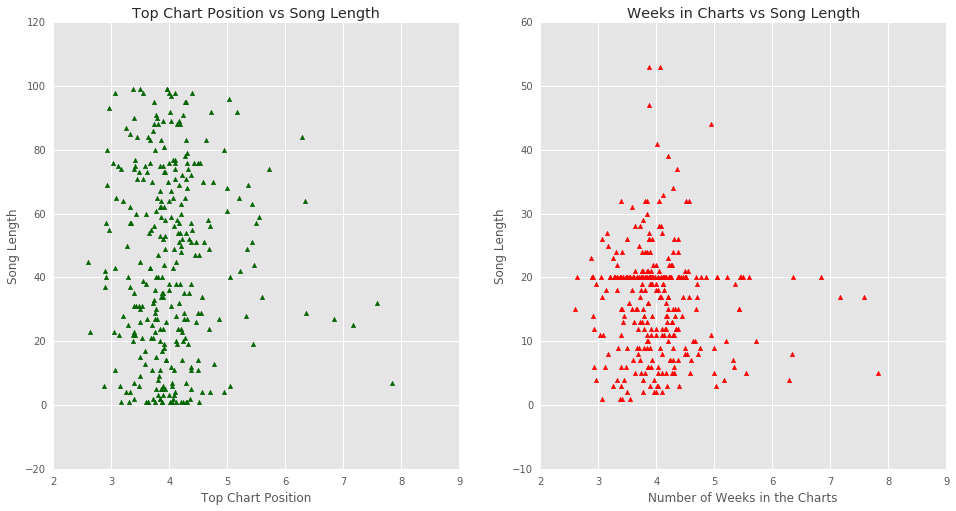

In [428]:
# plot song length against both peak chart position and weeks in the charts
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(music["length_mins"], music["top_position"],color='darkgreen', marker='^')
ax[0].set(title="Top Chart Position vs Song Length",xlabel="Top Chart Position", ylabel = "Song Length")
ax[1].scatter(music["length_mins"], music["weeks_in_charts"],color='red', marker='^')
ax[1].set(title="Weeks in Charts vs Song Length",xlabel="Number of Weeks in the Charts", ylabel = "Song Length")
plt.show()

In [429]:
# perform two sample two tailed test to songs in the top 10% by length and songs in the middle 10% by length.
# test will compare if mean peak position is different

# create subsets
q45=music["length_mins"].quantile(0.45)
q55=music["length_mins"].quantile(0.55)
q90= music["length_mins"].quantile(0.90)
middle_10pct = music[(music["length_mins"]>q45)&(music["length_mins"]<q55)]
top_10pct = music[music["length_mins"]>q90]

# calculated means, sd, and size
mean_mid10 = np.mean(middle_10pct["top_position"])
mean_top10 =np.mean(top_10pct["top_position"])
sd_mid10 = np.std(middle_10pct["top_position"])
sd_top10=np.std(top_10pct["top_position"])
n_mid10 = len(middle_10pct["top_position"])
n_top10 = len(top_10pct["top_position"])

# perform two sample, two tailed test
stats.ttest_ind_from_stats(mean_mid10, sd_mid10, n_mid10, mean_top10, sd_top10, n_top10, equal_var=True)

Ttest_indResult(statistic=0.3818928973705264, pvalue=0.70403956140798307)

In [430]:
# perform same test but comparing mean number of weeks in charts
mean_mid10 = np.mean(middle_10pct["weeks_in_charts"])
mean_top10 =np.mean(top_10pct["weeks_in_charts"])
sd_mid10 = np.std(middle_10pct["weeks_in_charts"])
sd_top10=np.std(top_10pct["weeks_in_charts"])
n_mid10 = len(middle_10pct["weeks_in_charts"])
n_top10 = len(top_10pct["weeks_in_charts"])

stats.ttest_ind_from_stats(mean_mid10, sd_mid10, n_mid10, mean_top10, sd_top10, n_top10, equal_var=True)

Ttest_indResult(statistic=0.59089306879239578, pvalue=0.55705731938805381)

**Neither test produced a significant result so there is no reason to think that the mean peak position or mean number of weeks in the charts is different for long songs compared to songs of a typical length.**

### Hypothesis 3

[<matplotlib.text.Text at 0x13c0e32d0>, <matplotlib.text.Text at 0x14227f210>]

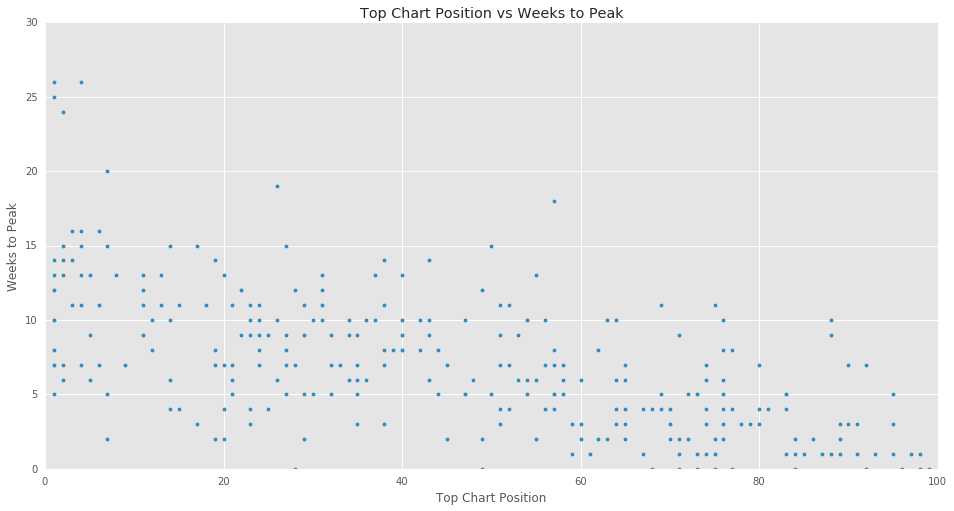

In [431]:
# plot peak chart position against weeks to peak
ax = music.plot("top_position","weeks_to_peak",kind="scatter", xlim=[0,100], ylim=[0,30], figsize=(16,8),\
           title="Top Chart Position vs Weeks to Peak")
ax.set(xlabel="Top Chart Position", ylabel="Weeks to Peak")

In [432]:
# perform a two sample, two tailed test to compare mean weeks to peak for songs that hit the top 40 and songs that did not

print stats.ttest_ind(music[music["top_position"]<=40]["weeks_to_peak"], music[music["top_position"]>40]["weeks_to_peak"])

Ttest_indResult(statistic=11.144459015020685, pvalue=1.7983168053870918e-24)


** This is significant.  There is reason to conclude that songs that hit the top 40 tend to peak at a different rate than songs that don't hit the top 40.**

In [433]:
# find weeks to leave chart after last at peak
def weeks_out(row):
    subrow = row[7:71]
    return np.where(pd.isnull(subrow)==False)[0][-1] - np.where(subrow==row["top_position"])[0][-1] + 1

In [434]:
# create column for weeks to leave chart
music["weeks_to_leave"]= music.apply(weeks_out,axis=1)
music.head()

,year,artist,track,time,genre,date.entered,date.peaked,week1,week2,week3,...,week62,week63,week64,week65,length_mins,top_position,weeks_to_peak,weeks_in_charts,weeks_in_top10,weeks_to_leave
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,3.633333,1.0,8.0,28,17,10
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,4.300000,1.0,8.0,26,18,9
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,4.116667,1.0,14.0,33,17,15
3,2000,Madonna,Music,"3,45,00 AM",Rock,2000-08-12,2000-09-16,41.0,23.0,18.0,...,NaN,NaN,NaN,NaN,3.750000,1.0,5.0,24,12,16
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,2000-08-05,2000-10-14,57.0,47.0,45.0,...,NaN,NaN,NaN,NaN,3.633333,1.0,10.0,21,8,8


[<matplotlib.text.Text at 0x144164fd0>, <matplotlib.text.Text at 0x12fce9a90>]

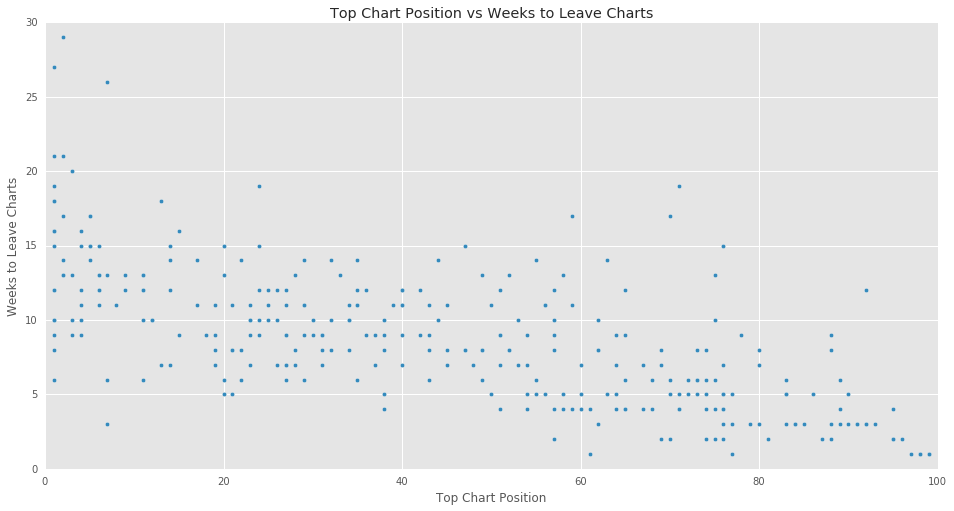

In [435]:
# plot position vs weeks to leave
ax = music.plot("top_position","weeks_to_leave",kind="scatter", figsize=(16,8),\
           title="Top Chart Position vs Weeks to Leave Charts", xlim=[0,100], ylim=[0,30])
ax.set(xlabel="Top Chart Position", ylabel="Weeks to Leave Charts")

In [436]:
# perform a two sample, two tailed test to compare mean weeks to leave charts after peaking
# for songs that hit the top 40 and songs that did not

print stats.ttest_ind(music[music["top_position"]<=40]["weeks_to_leave"], music[music["top_position"]>40]["weeks_to_leave"])

Ttest_indResult(statistic=11.342942379052012, pvalue=3.645384239253348e-25)


** This is also significant.  There is reason to believe that songs that reach the top 40 tend leave the charts at a different rate than those that do not hit the top 40.**

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

http://pclt.github.io/billboard-hits/